In [12]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
mnist = fetch_openml('mnist_784')
inputData, y = mnist["data"], mnist["target"]

inputData = inputData/ 255
nDigits = 10

yOneHot = np.zeros([y.shape[0],nDigits])
for i in range(y.shape[0]):
    yOneHot[i,int(y[i])] = 1

y = yOneHot

m = 60000
m_test = inputData.shape[0] - m

y_train, y_test = y[:m,:].reshape(m,nDigits), y[m:,:].reshape(m_test,nDigits)
InputData_train, InputData_test = inputData[:m,:], inputData[m:,:]

np.random.seed(1002)

In [17]:
y[7000,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

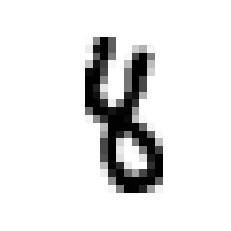

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [21]:
i = 7000
plt.imshow(InputData_train[i,:].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[i,:])

In [22]:
# Define activation functions, dervatives, loss

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(z):
    return z * (1-z)

def relu(x):
    return np.maximum(0,x)

def relu_derivative(x):
    return 0.5 * (np.sign(x)+1)

def CrossEntropyLoss(y,y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum
    
    return L

def softmax(y):
    return np.exp(y)/ np.sum(np.exp(y), axis=0)

def CE_Softmax_Derivative(output, ideal_output):
    return output - ideal_output


In [23]:
inputDim = InputData_train.shape[1]
nHidden = 64
learning_rate =1
weight_decay = 0.001

W1 = 0.01*np.random.rand(nHidden, inputDim) 
b1 = np.zeros((nHidden, 1))
W2 = 0.01*np.random.rand(nDigits, nHidden)
b2 = np.zeros((nDigits,1))

inputData = InputData_train
y = y_train

Epoch 0 cost:  2.30295095198555
Epoch 10 cost:  2.1792111503058957
Epoch 20 cost:  1.220014151708829
Epoch 30 cost:  0.7869406311035854
Epoch 40 cost:  0.7218048705729229
Epoch 50 cost:  0.6780928653292609
Epoch 60 cost:  0.40505189484698073
Epoch 70 cost:  0.34374236955189297
Epoch 80 cost:  0.4442487403566684
Epoch 90 cost:  0.29439557894423224


<function matplotlib.pyplot.show(*args, **kw)>

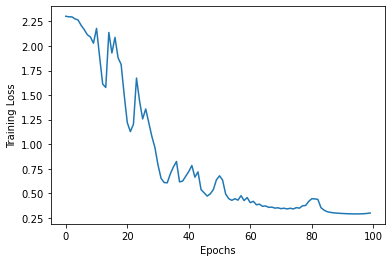

In [27]:
nEpochs = 100
costPlot = np.zeros(nEpochs)

for i in range(nEpochs):
    
    #Forward Pass
    Z1 = np.matmul(W1,inputData.T)+b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1)+b2
    A2 = softmax(Z2)
    
    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost
    
    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show    
    

In [31]:
Z1 = np.matmul(W1, InputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2

predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 959    0   10    2    1    9    9    2    4   11]
 [   0 1112    9    2    4    2    3   10    7    8]
 [   0    1  937   15    3    1    4   25    4    1]
 [   1    3   13  934    0   30    0    2   18   12]
 [   0    1   13    0  925    5    9    7    9   37]
 [   5    0    1   21    0  806    7    0   10    5]
 [  11    4   14    2   10   12  922    0   15    1]
 [   1    2   11   16    2    4    1  960    8    8]
 [   3   12   21   13    3   15    3    2  891    2]
 [   0    0    3    5   34    8    0   20    8  924]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1007
           1       0.98      0.96      0.97      1157
           2       0.91      0.95      0.93       991
           3       0.92      0.92      0.92      1013
           4       0.94      0.92      0.93      1006
           5       0.90      0.94      0.92       855
           6       0.96      0.93      0.95       991
           7       0.93      0.95   